# Task 1

$$
H = 75, T = 25
$$

$$
\max \limits_{p} L(p) = p^{75} \cdot (1-p)^{25}, p \in [0, 1]
$$

$$
\frac{∂L(p)}{∂p} = 75p^{74}(1-p)^{25} -p^{75} \cdot 25 (1-p)^{24} = 0
$$

$$
75 - 75p - 25p = 0
$$

$$
p = 0.75
$$

# Task 2

$y = x_1 + x_2$

Assuming that $x_1$ and $x_2$ are independant, their joint distribution function:


$Q(y) = ∫P_{x1}(x_1|\sigma_1)P_{x2}(y-x_1|\sigma_2) dx_1 $ - is a probability distribution function of $f(y) = x_1 + x_2$

$$Q(y) = ∫P_{x1}(x_1|\sigma_1)P_{x2}(y-x_1|\sigma_2) dx_1  = \int \frac{1}{\sqrt{2\pi}\sigma_1} \exp (-\frac{x_1^2}{2\sigma_1^2}) \frac{1}{\sqrt{2\pi}\sigma_2} \exp (- \frac{(y - x_1)^2}{2\sigma_2^2}) dx_1$$

$$
= \int \frac{1}{2\pi \sigma_1 \sigma_2} \exp (-\frac{x_1^2 \sigma_2^2 + \sigma_1^2 (y - x_1)^2}{2\sigma_1^2 \sigma_2^2}) dx_1
$$

$$ =  \int \frac{1}{2\pi \sigma_1 \sigma_2} \exp (- \frac{x_1^2\sigma_2^2 + \sigma_1^2y^2 - 2\sigma_1^2yx_1 + \sigma_1^2x_1^2}{2\sigma_1^2 \sigma_2^2})dx_1
$$

$$
= \int \frac{1}{2\pi \sigma_1 \sigma_2} \exp (-\frac{x_1(\sigma_1^2 + \sigma_2^2) - 2x_1y\sigma_1^2 + \sigma_1^2y^2}{2\sigma_1^2 \sigma_2^2})dx_1
$$

$$
 = \int \frac{1}{2\pi \sigma_1 \sigma_2} \exp(-\frac{1}{2} \frac{x_1^2 - 2x_1\frac{\sigma_1^2y}{(\sigma_1^2 + \sigma_2^2)} +\frac{\sigma_1^4y^2}{(\sigma_1^2 + \sigma_2^2)^2} - \frac{\sigma_1^4y^2}{(\sigma_1^2 + \sigma_2^2)^2} + \frac{y^2\sigma_1^2}{(\sigma_1^2 + \sigma_2^2)}}{\frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}})dx_1
$$

$$
= \int \frac{1}{\sqrt{2\pi} \frac{\sigma_1 \sigma_2}{\sqrt{\sigma_1^2 + \sigma_2^2}}} \exp(-\frac{1}{2} \frac{(x_1 - \frac{\sigma_1 y}{\sigma_1^2 + \sigma_2^2})^2}{\frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}}) dx_1 \int \frac{1}{\sqrt{2\pi} \sqrt{\sigma_1^2 + \sigma_2^2}} \exp (-\frac{1}{2} \frac{y^2\sigma_1^2(\sigma_1^2 + \sigma_2^2) - \sigma_1^4 y^2}{(\sigma_1^2 + \sigma_2^2)\sigma_1^2 \sigma_2^2}) dx_1
$$

The first integral is a normal distribution with $\sigma = \frac{\sigma_1\sigma_2}{\sqrt{\sigma_1^2 + \sigma_2^2}}$ and $\mu = \frac{\sigma_1y}{\sigma_1^2 + \sigma_2^2}$, so it's integral equals 1.
So we should find only value of the second integral.

$$
Q(y) = \int \frac{1}{\sqrt{2\pi} \sqrt{\sigma_1^2 + \sigma_2^2}} \exp (-\frac{1}{2} \frac{y^2\sigma_1^2(\sigma_1^2 + \sigma_2^2) - \sigma_1^4 y^2}{(\sigma_1^2 + \sigma_2^2)\sigma_1^2 \sigma_2^2}) dx_1
$$

$$
= \frac{1}{\sqrt{2\pi} \sqrt{\sigma_1^2 + \sigma_2^2}} \exp(-\frac{y^2}{2(\sigma_1^2 + \sigma_2^2)})
$$

Resulting value is a normal distribution with $\sigma = \sqrt{\sigma_1^2 + \sigma_2^2}$ and $\mu = 0$

# Task 5.

**1. Compute the maximum likelihood estimate of the coins biases $p_1$ and $p_2$.**

We have to maximize the marginal likelihood of the observed data:
$$
L({\boldsymbol {\theta }};\mathbf {X} )\propto P(\mathbf {X} \mid {\boldsymbol {\theta }})=\int P(\mathbf {X} ,\mathbf {Z} \mid {\boldsymbol {\theta }})\,d\mathbf {Z} =\int P(\mathbf {X} \mid \mathbf {Z} ,{\boldsymbol {\theta }})P(\mathbf {Z} \mid {\boldsymbol {\theta }})\,d\mathbf {Z}
$$

, where:
* $\theta$ is a vector of parameters, $\theta=(p_A, p_B)$, which we want to find.
* Z is a vector of ids of coins which were used in the exeriments: $Z = [0, 1, 0]$ or $Z=[0, 0, 0]$.
* X is a vector of observations: a series of $[T, H, T, T, ...]$

Since we have 8 possible variants of Z, and probability of choosing coin at any experiment is the same, we can rewrite it to:

$$
L({\boldsymbol {\theta }};\mathbf {X} )\propto  \sum \limits_{Z} P(X | Z, Q)
$$

$$
P(X|Z, Q) = P_1(X|Z, Q) * P_2(X|Z, Q) * P_2(X|Z, Q)
$$

$$
P_i(X|Z, Q) ∝ p_{z_i}^{k_i} (1 - p_{z_i})^{20 - k_i}
$$

, where
* $i$ - number of experiment: 1,2 or 3
* $z_i$ - coin chosen in i-th experiment
* $p_{z_i}$ - probability of HEAD for coin $z_i$
* $k_i$ - number of times when we had HEAD in i-th experiment

In [1]:
import numpy as np
import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
from scipy import optimize

result = [
    'TTTTHHHTTTHTTTHHTTTT',
    'HHHHHHHHHHHHHTTTHHHH',
    'HHHTHHHHHHTHTTHTHHHH'
]

In [2]:
import itertools

coins = [False, True] # if True, first coin was chosen
Z = list(itertools.product(coins, repeat=3))
Z

[(False, False, False),
 (False, False, True),
 (False, True, False),
 (False, True, True),
 (True, False, False),
 (True, False, True),
 (True, True, False),
 (True, True, True)]

In [3]:
def prob_exp(z, p1, p2, exp_num):
  heads = result[exp_num].count('H')
  tails = result[exp_num].count('T')

  p = p1 if z[exp_num] else p2
  p = min([1, max([0, p])])
  return (p**heads) * ((1-p)**tails)

def prob(z, p1, p2):
  return prob_exp(z, p1, p2, 0) * prob_exp(z, p1, p2, 1) * prob_exp(z, p1, p2, 2)

def L(p, multiplier = 1):
  loss_summ = 0
  for z in Z:
    loss_summ += prob(z, p[0], p[1])
  return loss_summ*multiplier


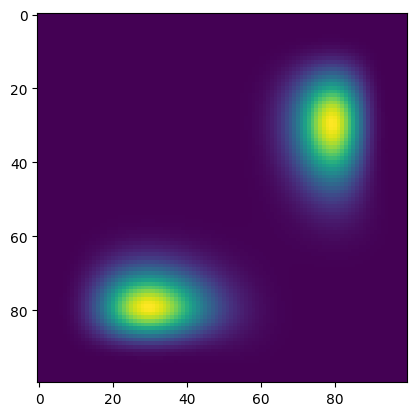

In [4]:
import matplotlib.pyplot as plt

FS = [ [ L([p1, p2]) for p1 in np.linspace(0, 1, 100) ] for p2 in np.linspace(0, 1, 100) ]
plt.imshow(FS)

Lets solve optimization task and find exact numbers.

$L(p)$ values are very small, so to make calculations more stable lets use norm coeffifient:

$$
\int\limits_{p_1=0}^{1}\int\limits_{p_2=0}^{1}P(p1, p2|X)dp_1dp_2 = 1
$$

In [5]:
from scipy.integrate import dblquad

res = dblquad(lambda x, y: L([x, y]), 0, 1, 0, 1)
norm_coeff = 1.0 / res[0]
norm_coeff

1251877956785553.5

In [6]:
from scipy import optimize
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint
from scipy.optimize import Bounds

bounds = Bounds([0.0, 0.0], [1.0, 1.0])

def loss(p):
  return -L(p, multiplier=norm_coeff)

p0 = np.random.uniform(low=0.0, high=1.0, size=(2,))
res = optimize.minimize(loss,
                        p0,
                        jac = jax.grad(loss),
                        hess=jax.hessian(loss),
                        method='trust-constr',
                        bounds=bounds
                        )
print(f'Best estimation of coins biases p_1 and p_2 ={res.x}')

Best estimation of coins biases p_1 and p_2 =[0.80000314 0.30009811]


**2. Estimate a posteriori probability that biases of the coins are approximately the same: $P(|p_1 - p_2| < 0.1)$.**


To find probability we have to intergrate by all such $p_1$ and $p_2$ that $|p1 - p2| < 0.1$:

$$
\int\limits_{p_1=0}^{1}\int\limits_{p_2=p_1 - 0.1}^{p_1 + 0.1}P(p1, p2|X)dp_1dp_2 = 1
$$

, assuming that $P(p_i) = 0$ for $p_i < 0$

Nomalization coefficent, calculated earlier, is not quite right - it gives probabilities > 1

In [65]:
norm_coeff * L([0.8, 0.3])

12.556814663146152

Lets calculate numerically:

In [66]:
data = [ [ L([p1, p2]) for p1 in np.linspace(0, 1, 1000) ] for p2 in np.linspace(0, 1, 1000) ]

In [67]:
norm_coeff = 1 / sum(np.array(data).flatten())

In [68]:
norm_coeff * L([0.8, 0.3])

1.2581929560601826e-05

In [69]:
data_small_diff = [ [ L([p1, p2]) for p1 in np.linspace(0, 1, 1000) if abs(p1 - p2) < 0.1] for p2 in np.linspace(0, 1, 1000) ]

In [75]:
probs_sum = 0
for l in data_small_diff:
  for val in l:
    probs_sum += val

probability = probs_sum * norm_coeff
print(f'Probability that |p_1 - p_2| < 0.1 is {probability*100:.3f}%')

Probability that |p_1 - p_2| < 0.1 is 0.360%


**3.Estimate a posteriori probability that in each of the three experiments above exactly the same coin was selected.**

Need to check 2 possible outcomes: Z = [0, 0, 0], [1, 1, 1].

$$
P(Z|X) \propto \int\limits_{p1=0}^{1}\int\limits_{p2=0}^{1} P(X|Z, Q) dp_1 dp_2
$$

So, need to find: $P(Z_{[0, 0, 0]}|X) + P(Z_{[1, 1, 1]}|X)$, and $\sum\limits_{Z} P(Z_i|X)  = 1$

In [76]:
first_exp = [False, False, False]
second_exp = [True, True, True]

required_probs = [ [ [ prob(z, p1, p2) for p1 in np.linspace(0, 1, 1000) ] for p2 in np.linspace(0, 1, 1000) ] for z in [first_exp, second_exp]]

In [80]:
probability_of_two_outcomes = sum(np.array(required_probs).flatten()) * norm_coeff
print(f'Probability that Z=[0, 0, 0] or Z = [1, 1, 1] is {probability_of_two_outcomes*100:.3f}%')

Probability that Z=[0, 0, 0] or Z = [1, 1, 1] is 0.290%


In [81]:
# just checking what combination is the most probable
for z in Z:
  probability =  [ [ prob(z, p1, p2) for p1 in np.linspace(0, 1, 1000) ] for p2 in np.linspace(0, 1, 1000) ]
  probability = sum(np.array(probability).flatten()) * norm_coeff
  print(f'Probability that Z={z} is {probability*100:.3f}%')


Probability that Z=(False, False, False) is 0.145%
Probability that Z=(False, False, True) is 0.106%
Probability that Z=(False, True, False) is 0.972%
Probability that Z=(False, True, True) is 48.778%
Probability that Z=(True, False, False) is 48.778%
Probability that Z=(True, False, True) is 0.972%
Probability that Z=(True, True, False) is 0.106%
Probability that Z=(True, True, True) is 0.145%


# Task 6

$$
x_t = x_{t-1} + u_{t-1} + \epsilon_{t-1}
$$

$$
z_t = x_{t} + \eta_t
$$

$$
P(\epsilon_t) \sim N(0, \sigma)
$$

$$
P(\eta_t) \sim N(0, 2\sigma)
$$

$$
u_t = u
$$

**a)**

$P(x_0|z_0) \propto P(z_0|x_0) =  P(\eta_0 | x_0) = \frac{1}{\sqrt{2\pi}2\sigma} \exp(-\frac{1}{2} \frac{\eta_0^2}{4\sigma^2}) = \frac{1}{\sqrt{2\pi}2\sigma} \exp(\frac{-\eta_0^2}{8\sigma^2}) = \frac{1}{\sqrt{2\pi}2\sigma} \exp(\frac{-(z_0 - x_0)^2}{8\sigma^2}) $

This is a normal distribution with parameters:
$$mean = z_0$$
$$std = 2\sigma$$

**b).**

$P(x_0|z_0, z_1) \propto P(z_0, z_1|x_0) = P(\eta_0, \eta_1, \epsilon_0|x_0) = \int\limits_{x1}P(\eta_0, \eta_1, \epsilon_0|x_0, x_1)dx_1$

$
P(\eta_0, \eta_1, \epsilon_0|x_0, x_1) = P(\eta_0) * P(\eta_1) * P(\epsilon_0)
= \frac{1}{\sqrt{2\pi}2\sigma} \exp(-\frac{1}{2} \frac{\eta_0^2}{4\sigma^2}) \cdot \frac{1}{\sqrt{2\pi}2\sigma} \exp(-\frac{1}{2} \frac{\eta_1^2}{4\sigma^2}) \cdot \frac{1}{\sqrt{2\pi}\sigma} \exp(-\frac{1}{2} \frac{\epsilon_1^2}{\sigma^2})$

$\eta_0 = z_0 - x_0$

$\eta_1 = z_1 - x_1$

$\epsilon_0 = x_1 - x_0 - u$

=> $P(\eta_0, \eta_1, \epsilon_0|x_0, x_1) = \frac{1}{\sqrt{2\pi}2\sigma} \exp(-\frac{(z_0 - x_0)^2}{8\sigma^2}) \cdot \frac{1}{\sqrt{2\pi}2\sigma} \exp(-\frac{(z_1 - x_1)^2}{8\sigma^2}) \cdot \frac{1}{\sqrt{2\pi}\sigma} \exp(-\frac{(x_1 - x_0 - u)^2}{2\sigma^2})$


$$P(x_0|z_0, z_1) \propto \int\limits_{x1}P(\eta_0, \eta_1, \epsilon_0|x_0, x_1)dx_1 $$
$$= \int\limits_{x1}\frac{1}{\sqrt{2\pi}2\sigma} \exp(-\frac{(z_0 - x_0)^2}{8\sigma^2}) \cdot \frac{1}{\sqrt{2\pi}2\sigma} \exp(-\frac{(z_1 - x_1)^2}{8\sigma^2}) \cdot \frac{1}{\sqrt{2\pi}\sigma} \exp(-\frac{(x_1 - x_0 - u)^2}{2\sigma^2}) dx_1$$

$$
 = \frac{1}{8\pi\sqrt{2\pi}\sigma^3} \exp(-\frac{(z_0 - x_0)^2}{8\sigma^2}) \int\limits_{x1} \exp(-\frac{(z_1 - x_1)^2 + 4(x_1 - x_0 - u)^2)}{8\sigma^2}) dx_1
$$

$$
 = \frac{1}{8\pi\sqrt{2\pi}\sigma^3} \exp(-\frac{(z_0 - x_0)^2}{8\sigma^2}) \int\limits_{x1} \exp(-\frac{(z_1^2 -2z_1x_1 + x_1^2 + 4x_1^2 - 8x_1x_0 + 4x_0^2 - 8x_1u + 8x_0u + 4u^2)}{8\sigma^2}) dx_1
$$

$$
 = \frac{1}{8\pi\sqrt{2\pi}\sigma^3} \exp(-\frac{(z_0 - x_0)^2}{8\sigma^2}) \int\limits_{x1} \exp(-\frac{5x_1^2 + x_1(-2z_1 -8x_0-8u) + (z_1^2 + 4x_0^2 + 8x_0u +4u^2)}{8\sigma^2}) dx_1
$$

$$
 = \frac{1}{8\pi\sqrt{2\pi}\sigma^3} \exp(-\frac{(z_0 - x_0)^2}{8\sigma^2}) \int\limits_{x1} \exp(-\frac{1}{2}x_1^2\frac{5}{\sigma^24} + x_1\frac{2z_1 + 8x_0 + 8u}{8\sigma^2} - \frac{z_1^2 + 4x_0^2 + 8x_0u +4u^2}{8\sigma^2}) dx_1
$$

Using equation: $∫e^{-\frac{1}{2}x^TAx + B^Tx}dx = \sqrt{\frac{2\pi}{detA}}e^{\frac{1}{2}B^TA^{-1}B}$, with $A = \frac{5}{4\sigma^2}$ and B = $\frac{z_1 + 4x_0 + 4u}{4\sigma^2}$:

$$
 = \frac{1}{8\pi\sqrt{2\pi}\sigma^3} \exp(-\frac{(z_0 - x_0)^2}{8\sigma^2} - \frac{z_1^2 + 4x_0^2 + 8x_0u +4u^2}{8\sigma^2}) \frac{\sqrt{2\pi}2\sigma}{\sqrt{5}} \exp(\frac{1}{2} \frac{(z_1 + 4x_0 + 4u)^2}{16\sigma^4} \frac{4\sigma^2}{5})
$$

$$
= \frac{1}{4\sqrt{5}\pi\sigma^2} \exp(-\frac{(z_0 - x_0)^2}{8\sigma^2} -\frac{(z_1 - x_0 - u)^2}{10\sigma^2})
$$

This is a normal distribution with parameters:
$$mean = \frac{5z_0 + 4z_1 -4u_0}{9}$$
$$std = \frac{2\sigma\sqrt{5}}{3}$$

**c).**

Find $P(x_1|z_0, z_2)$.



$
P(x_0, x_1, x_2 | z_0, z_2) \propto P(z_0, z_2 | x_0, x_1, x_2) = P(\eta_0, \eta_2, \epsilon_0, \epsilon_1 | x_0, x_1, x_2) = P(\eta_0) * P(\eta_2) * P(\epsilon_0)* P(\epsilon_1) = \frac{1}{\sqrt{2\pi}2\sigma} \exp(-\frac{1}{2} \frac{\eta_0^2}{4\sigma^2}) \cdot \frac{1}{\sqrt{2\pi}2\sigma} \exp(-\frac{1}{2} \frac{\eta_2^2}{4\sigma^2}) \cdot \frac{1}{\sqrt{2\pi}\sigma} \exp(-\frac{1}{2} \frac{\epsilon_0^2}{\sigma^2}) \exp(-\frac{1}{2} \frac{\epsilon_1^2}{\sigma^2})
$

$
P(x_1|z_0, z_2) = \int\limits_{x_0}\int\limits_{x_2} P(z_0, z_2 | x_0, x_1, x_2) dx_0 dx_2
$